<a href="https://colab.research.google.com/github/njokimatheri/imageClassification_DeepLearningCNN/blob/main/Eval_with_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load Data
# Calculate Mean and Standard Deviation to guide on normalization
def get_mean_std(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    total_images = 0

    for images, _ in loader:
        images = images.view(images.size(0), images.size(1), -1)  # Flatten H and W
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += images.size(0)

    mean /= total_images
    std /= total_images
    return mean, std

# Temporary dataset before normalization
temp_transform = transforms.ToTensor()
temp_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=temp_transform)
mean, std = get_mean_std(temp_dataset)
# Print the mean and std
print(f"Calculated mean: {mean}")
print(f"Calculated std:  {std}")

Calculated mean: tensor([0.4914, 0.4822, 0.4465])
Calculated std:  tensor([0.2023, 0.1994, 0.2010])


In [ ]:
# Normalize using calculated mean & std and augment only the train data
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

In [ ]:
# CIFAR-10 Data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

In [ ]:
# The custom CNN Model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [ ]:
# Train function
def train_model(model, trainloader, epochs=6):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.to(device)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}")
    return model


Training Custom CNN...
Epoch [1/6], Loss: 1.6741
Epoch [2/6], Loss: 1.3158
Epoch [3/6], Loss: 1.1332
Epoch [4/6], Loss: 1.0311
Epoch [5/6], Loss: 0.9657
Epoch [6/6], Loss: 0.9073

Test Accuracy: 72.83%

Classification Report:
              precision    recall  f1-score   support

       Plane       0.77      0.77      0.77      1000
         Car       0.91      0.80      0.85      1000
        Bird       0.61      0.57      0.59      1000
         Cat       0.61      0.48      0.54      1000
        Deer       0.75      0.60      0.67      1000
         Dog       0.61      0.71      0.65      1000
        Frog       0.67      0.87      0.76      1000
       Horse       0.82      0.76      0.79      1000
        Ship       0.81      0.87      0.84      1000
       Truck       0.76      0.86      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



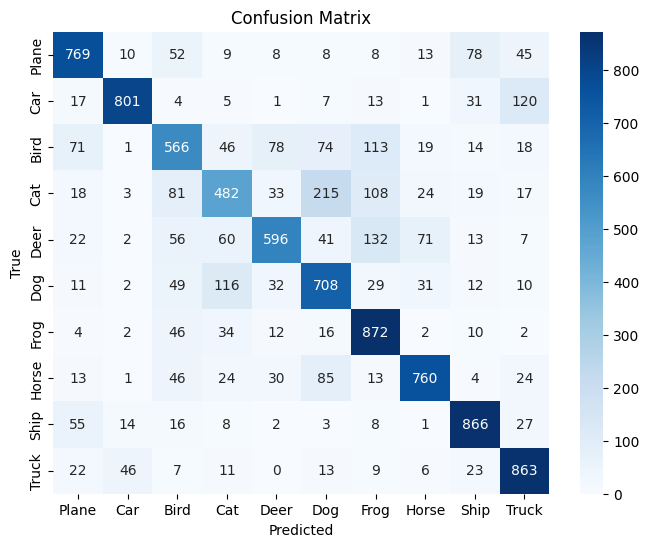


Training ResNet18...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/6], Loss: 1.0278
Epoch [2/6], Loss: 0.7376
Epoch [3/6], Loss: 0.6439
Epoch [4/6], Loss: 0.5930
Epoch [5/6], Loss: 0.5523
Epoch [6/6], Loss: 0.5121

Test Accuracy: 81.47%

Classification Report:
              precision    recall  f1-score   support

       Plane       0.82      0.85      0.83      1000
         Car       0.94      0.83      0.88      1000
        Bird       0.82      0.75      0.78      1000
         Cat       0.67      0.61      0.64      1000
        Deer       0.82      0.81      0.82      1000
         Dog       0.69      0.78      0.73      1000
        Frog       0.79      0.93      0.85      1000
       Horse       0.91      0.81      0.85      1000
        Ship       0.91      0.87      0.89      1000
       Truck       0.83      0.91      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



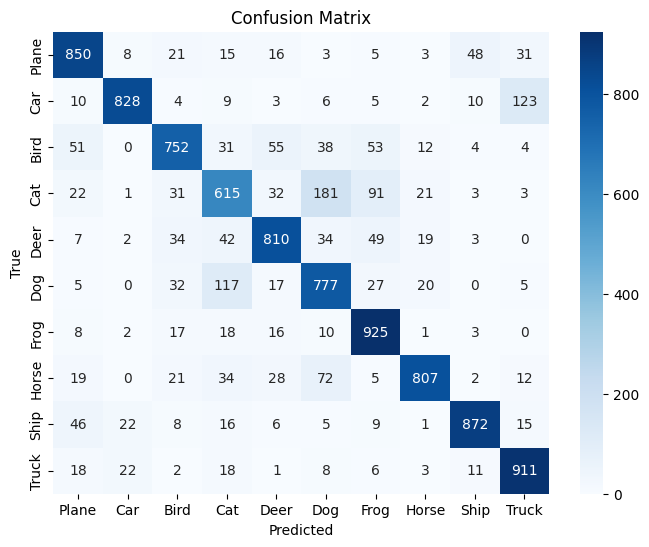


Training VGG16...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/6], Loss: 1.9395
Epoch [2/6], Loss: 1.5363
Epoch [3/6], Loss: 1.3533
Epoch [4/6], Loss: 1.1017
Epoch [5/6], Loss: 0.9129
Epoch [6/6], Loss: 0.8099

Test Accuracy: 76.43%

Classification Report:
              precision    recall  f1-score   support

       Plane       0.77      0.73      0.75      1000
         Car       0.81      0.96      0.88      1000
        Bird       0.75      0.58      0.65      1000
         Cat       0.56      0.59      0.58      1000
        Deer       0.71      0.81      0.75      1000
         Dog       0.77      0.62      0.68      1000
        Frog       0.79      0.84      0.81      1000
       Horse       0.87      0.77      0.81      1000
        Ship       0.87      0.86      0.87      1000
       Truck       0.77      0.89      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



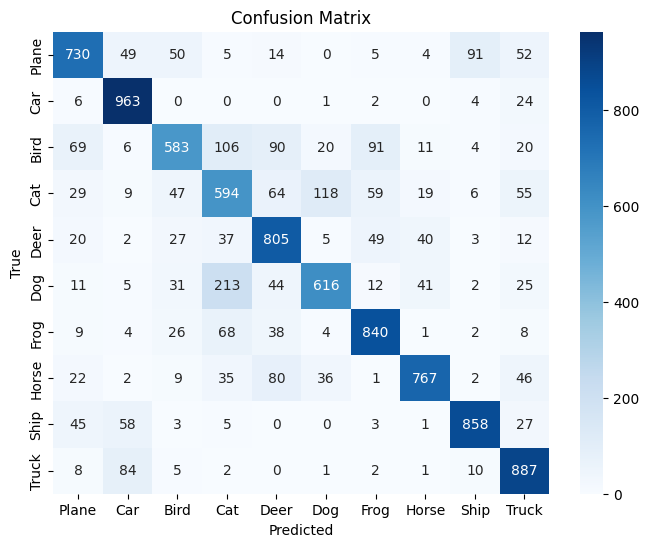


=== Final Accuracies ===
Custom CNN Accuracy: 72.83%
ResNet18 Accuracy:   81.47%
VGG16 Accuracy:      76.43%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Extended evaluation with confusion matrix
def evaluate_with_confusion(model, testloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Accuracy
    acc = 100 * np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
    print(f"\nTest Accuracy: {acc:.2f}%")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    return acc

# CIFAR-10 class names
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# ---------- Run Custom CNN ----------
print("\nTraining Custom CNN...")
custom_cnn = CustomCNN()
custom_cnn = train_model(custom_cnn, trainloader)
custom_acc = evaluate_with_confusion(custom_cnn, testloader, class_names)

# ---------- Run ResNet18 ----------
print("\nTraining ResNet18...")
resnet_model = models.resnet18(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 10)
resnet_model = train_model(resnet_model, trainloader)
resnet_acc = evaluate_with_confusion(resnet_model, testloader, class_names)

# ---------- Run VGG16 ----------
print("\nTraining VGG16...")
vgg_model = models.vgg16(pretrained=True)
vgg_model.classifier[6] = nn.Linear(vgg_model.classifier[6].in_features, 10)
vgg_model = train_model(vgg_model, trainloader)
vgg_acc = evaluate_with_confusion(vgg_model, testloader, class_names)

# ---------- Summary ----------
print("\n=== Final Accuracies ===")
print(f"Custom CNN Accuracy: {custom_acc:.2f}%")
print(f"ResNet18 Accuracy:   {resnet_acc:.2f}%")
print(f"VGG16 Accuracy:      {vgg_acc:.2f}%")
